In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

## SIR Model

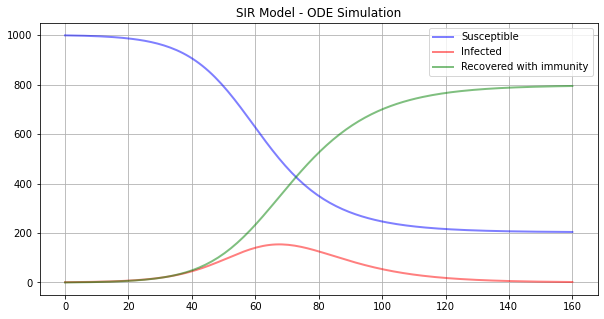

In [2]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

N = 1000
I0, R0 = 1, 0
S0 = N - I0 - R0
beta, gamma = 0.2, 1./10 
t = np.linspace(0, 160, 160)

y0 = S0, I0, R0

ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

fig, ax = plt.subplots(figsize = (10,5))
ax.set_title(f'SIR Model - ODE Simulation')
ax.plot(t, S, 'b-', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r-', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g-', alpha=0.5, lw=2, label='Recovered with immunity')
ax.legend()
ax.grid()
plt.show()

## SEIAR Model

In [3]:
N = 1000

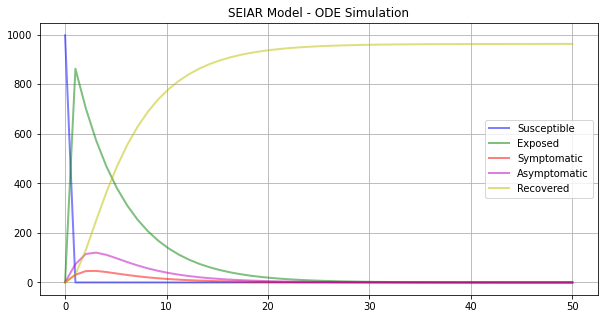

In [4]:
# set initial condition
E, I, A, R = 1, 1, 1, 0
S = N - E - I - A - R

beta_IH, beta_AH = 0.5, 0.45 # transmission rate 
gamma = 0.2 # incubation rate
theta = 0.3 # proportion showing symptom
lam = 0.7 # infection period (1/lambda)
delta = 0.1 # death rate per day

t = np.linspace(0, 50, 50)

# define ODE system
def deriv(y, t, beta_IH, beta_AH, gamma, theta, lam, delta):

    S, E, I, A, R = y

    dSdt = -1 * S * (beta_IH * (I) + beta_AH * (A))
    dEdt = (S * (beta_IH * (I) + beta_AH * (A))) - gamma * E
    dIdt = (theta * gamma * E) - (lam * I) - (delta * I)
    dAdt = ((1 - theta) * gamma * E) - (lam * A)
    dRdt = lam * (I + A)

    return dSdt, dEdt, dIdt, dAdt, dRdt

# combine initial condition
y0 = S, E, I, A, R

# solve ODE
ret = odeint(deriv, y0, t, args=(beta_IH, beta_AH, gamma, theta, lam, delta))
S, E, I, A, R = ret.T

# plot ODE
fig, ax = plt.subplots(figsize = (10,5))
ax.set_title(f'SEIAR Model - ODE Simulation')
ax.plot(t, S, 'b-', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E, 'g-', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I, 'r-', alpha=0.5, lw=2, label='Symptomatic')
ax.plot(t, A, 'm-', alpha=0.5, lw=2, label='Asymptomatic')
ax.plot(t, R, 'y-', alpha=0.5, lw=2, label='Recovered')
ax.legend()
ax.grid()
plt.show()

## SEIAR (High and Low)

In [10]:
def plot_SEIAR(High, Low, init_cond_list, param_list):

    # set initial condition
    H = High
    E_High = init_cond_list[0]
    I_High = init_cond_list[1]
    A_High = init_cond_list[2]
    R_High = init_cond_list[3]
    S_High = H - E_High - I_High - A_High - R_High

    L = Low
    E_Low = init_cond_list[4]
    I_Low = init_cond_list[5]
    A_Low = init_cond_list[6]
    R_Low = init_cond_list[7]
    S_Low = L - E_Low - I_Low - A_Low - R_Low

    N = H + L

    beta_IH_High = param_list[0]
    beta_AH_High = param_list[1]
    gamma_High = param_list[2]
    theta_High = param_list[3] 
    lam_High = param_list[4] 
    delta_High = param_list[5] 
    beta_IH_Low = param_list[6] 
    beta_AH_Low = param_list[7] 
    gamma_Low = param_list[8] 
    theta_Low = param_list[9] 
    lam_Low = param_list[10] 
    delta_Low = param_list[11] 


    t = np.linspace(0, 50, 50)

    # define ODE system
    def deriv_High_and_Low(y, t, beta_IH_High, beta_IH_Low, beta_AH_High, beta_AH_Low, gamma_High, gamma_Low, theta_High, theta_Low, lam_High, lam_Low, delta_High, delta_Low):

        # Do we have different parameter for High and Low risk group?

        S_High, S_Low, E_High, E_Low, I_High, I_Low, A_High, A_Low, R_High, R_Low = y

        dS_High = -1 * S_High * (beta_IH_High * (I_High + I_Low) + beta_AH_High * (A_High + A_Low))
        dS_Low = -1 * S_Low * (beta_IH_Low * (I_Low) + beta_AH_Low * (A_Low))

        dE_High = (S_High * (beta_IH_High * (I_High) + beta_AH_Low * (A_High))) - gamma_High * E_High
        dE_Low = (S_Low * (beta_IH_Low * (I_Low) + beta_AH_Low * (A_Low))) - gamma_Low * E_Low

        dI_High = (theta_High * gamma_High * E_High) - (lam_High * I_High) - (delta_High * I_High)
        dI_Low = (theta_Low * gamma_Low * E_Low) - (lam_Low * I_Low) - (delta_Low * I_Low)

        dA_High = ((1 - theta_High) * gamma_High * E_High) - (lam_High * A_High)
        dA_Low = ((1 - theta_Low) * gamma_Low * E_Low) - (lam_Low * A_Low)

        dR_High = lam_High * (I_High + A_High)
        dR_Low = lam_Low * (I_Low + A_Low)

        return dS_High, dS_Low, dE_High, dE_Low, dI_High, dI_Low, dA_High, dA_Low, dR_High, dR_Low

    # combine initial condition
    y0 = S_High, S_Low, E_High, E_Low, I_High, I_Low, A_High, A_Low, R_High, R_Low

    # solve ODE
    ret = odeint(deriv_High_and_Low, y0, t, args=(beta_IH_High, beta_IH_Low, beta_AH_High, beta_AH_Low, gamma_High, gamma_Low, theta_High, theta_Low, lam_High, lam_Low, delta_High, delta_Low))
    S_High, S_Low, E_High, E_Low, I_High, I_Low, A_High, A_Low, R_High, R_Low = ret.T

    # plot ODE
    fig, ax = plt.subplots(1, 2,figsize = (25,10))
    ax[0].set_title('SEIAR Model - ODE Simulation - High Risk Group')
    ax[0].plot(t, S_High / N, 'b-', alpha=0.5, lw=2, label='Susceptible - High')
    ax[0].plot(t, E_High / N, 'g-', alpha=0.5, lw=2, label='Exposed - High')
    ax[0].plot(t, I_High / N, 'r-', alpha=0.5, lw=2, label='Symptomatic - High')
    ax[0].plot(t, A_High / N, 'm-', alpha=0.5, lw=2, label='Asymptomatic - High')
    ax[0].plot(t, R_High / N, 'y-', alpha=0.5, lw=2, label='Recovered - High')
    ax[0].legend()
    ax[0].grid()

    ax[1].set_title('SEIAR Model - ODE Simulation - Low Risk Group')
    ax[1].plot(t, S_Low / N, 'b-', alpha=0.5, lw=2, label='Susceptible - Low')
    ax[1].plot(t, E_Low / N, 'g-', alpha=0.5, lw=2, label='Exposed - Low')
    ax[1].plot(t, I_Low / N, 'r-', alpha=0.5, lw=2, label='Symptomatic - Low')
    ax[1].plot(t, A_Low / N, 'm-', alpha=0.5, lw=2, label='Asymptomatic - Low')
    ax[1].plot(t, R_Low / N, 'y-', alpha=0.5, lw=2, label='Recovered - Low')
    ax[1].legend()
    ax[1].grid()
    plt.show()

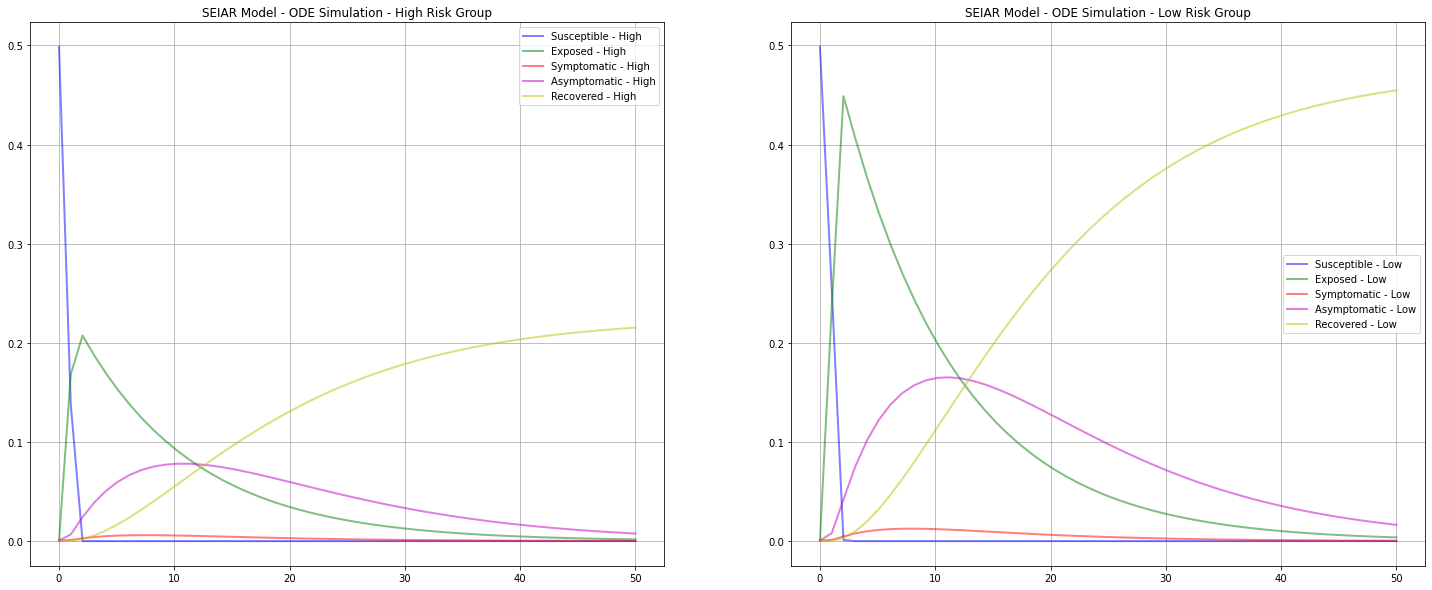

In [11]:
I0 = [1,1,1,0,1,1,1,0]
param = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
plot_SEIAR(1000, 1000, I0, param)

## SEIAR (6 regions)

In [7]:
def plot_six_regions(init_dict, param_dict):
    """
    Plot six regions of SEIAR model
    """

    i = 1
    for key1, key2 in zip(init_dict.keys(), param_dict.keys()):
        print(f'=====================Region {i}=====================')
        plot_SEIAR(1000, 1000, init_dict[key1], param_dict[key2])
        print('\n')
        i += 1
    

In [8]:
initial_param = {'region_1': [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1], 'region_2' : [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1], 'region_3' : [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1], 'region_4' : [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1], 'region_5' : [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1], 'region_5' : [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1], 'region_6' : [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]}
initial_pop = {'region_1' : [1,1,1,0,1,1,1,0], 'region_2' : [1,1,1,0,1,1,1,0], 'region_3' : [1,1,1,0,1,1,1,0], 'region_4' : [1,1,1,0,1,1,1,0], 'region_5' : [1,1,1,0,1,1,1,0], 'region_6' : [1,1,1,0,1,1,1,0]}

=====================Region 1=====================


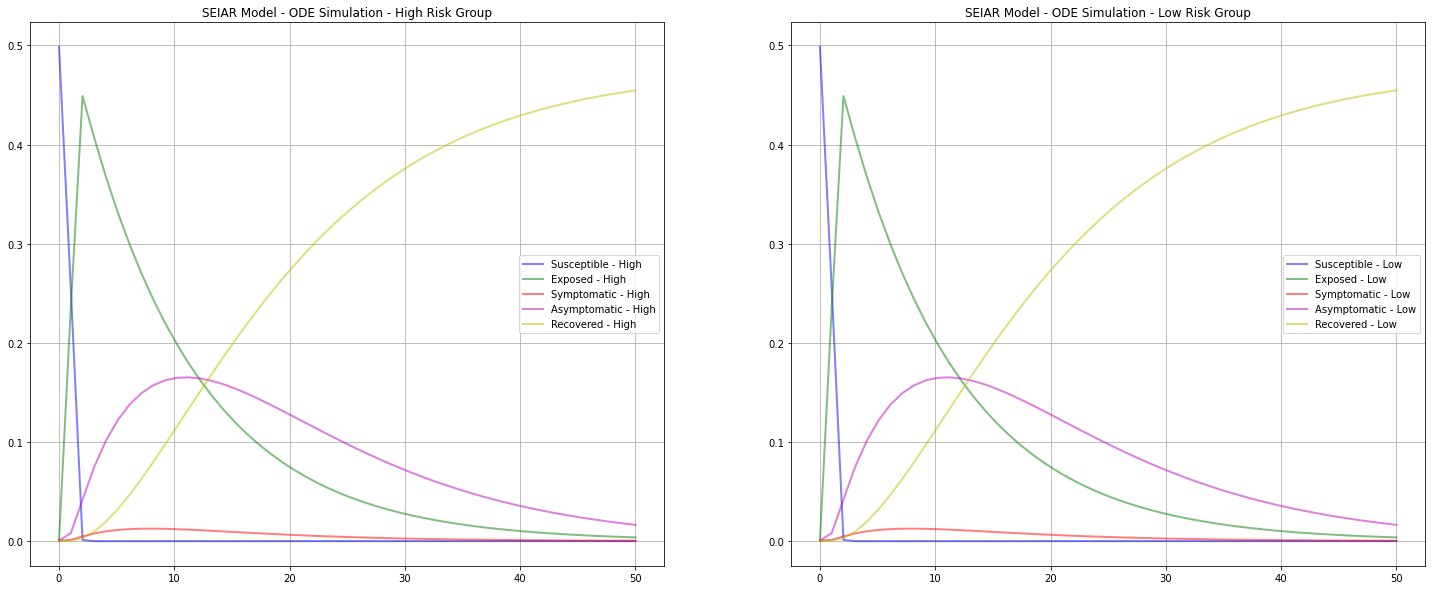



=====================Region 2=====================


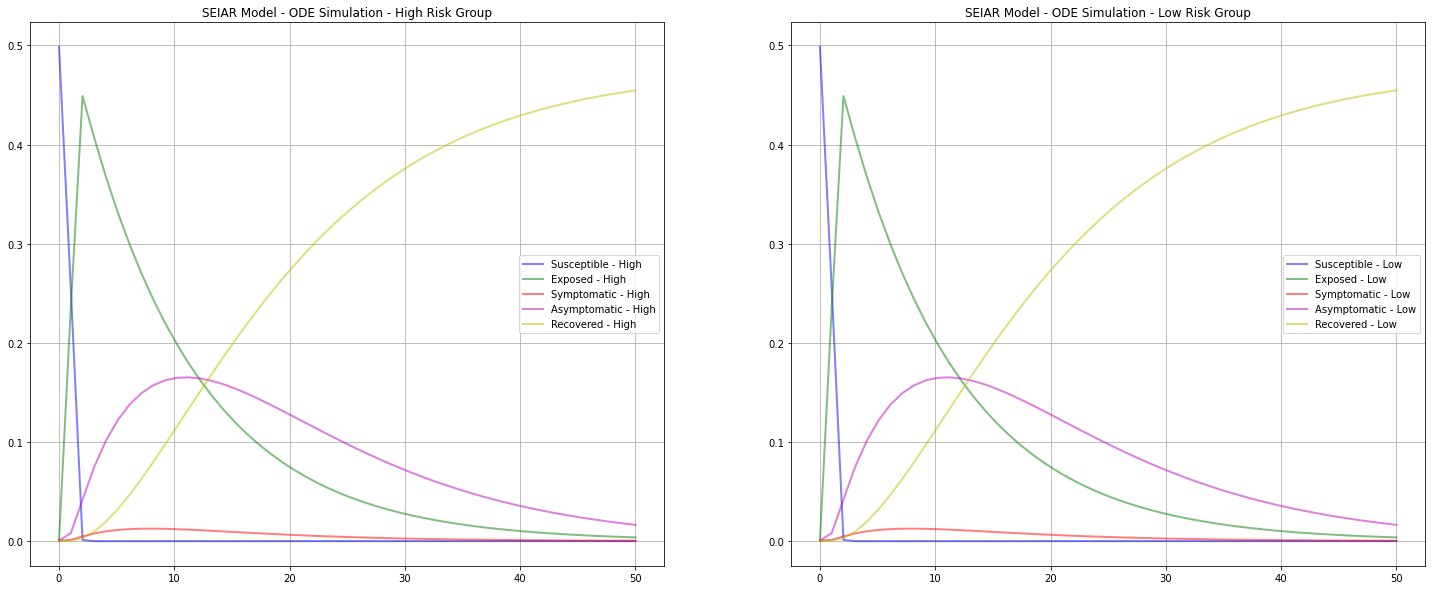



=====================Region 3=====================


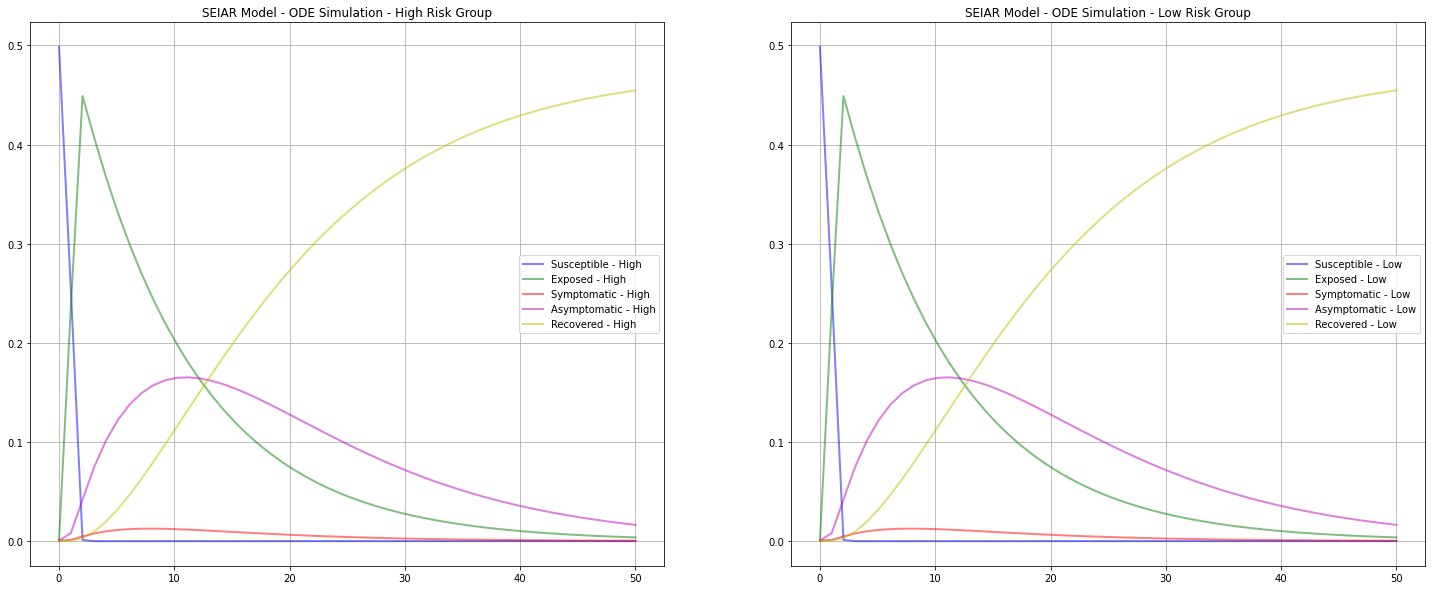



=====================Region 4=====================


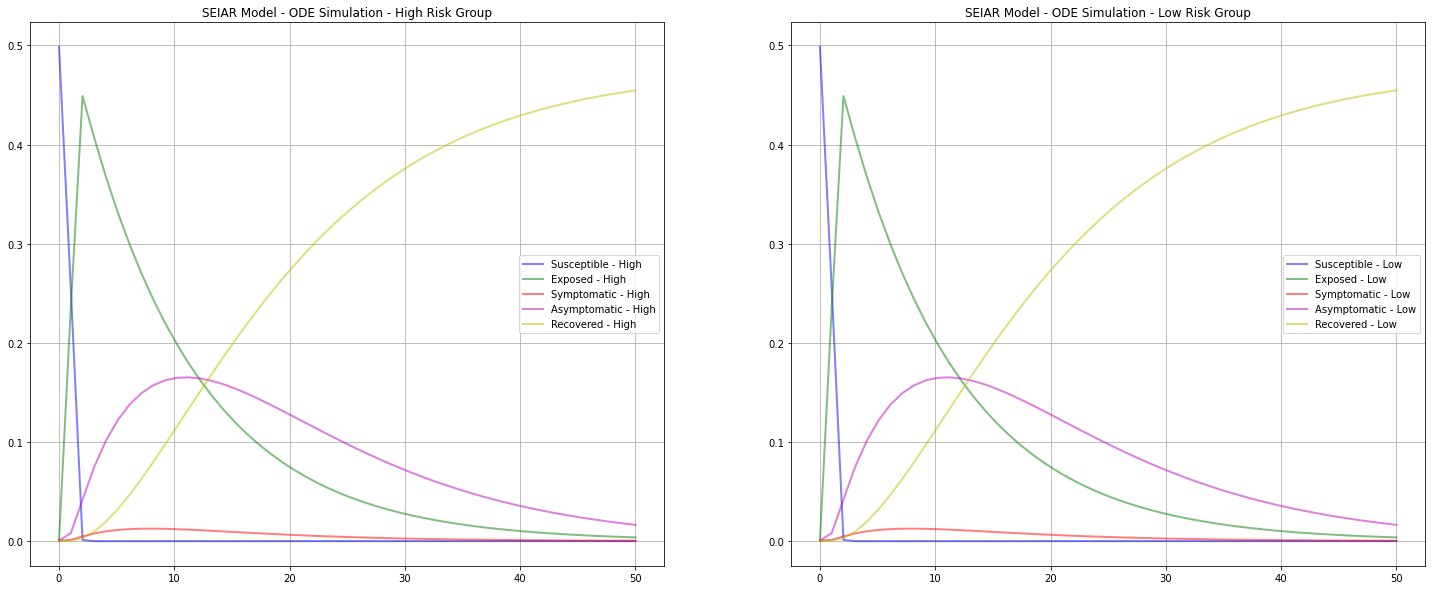



=====================Region 5=====================


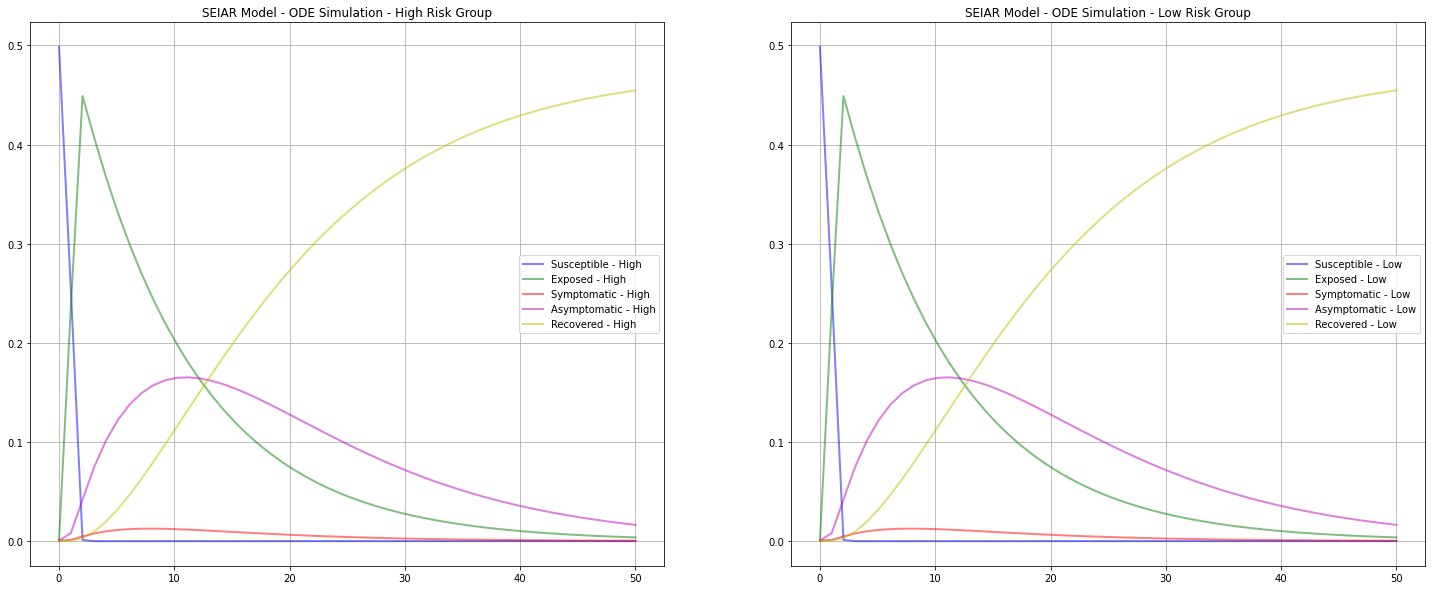



=====================Region 6=====================


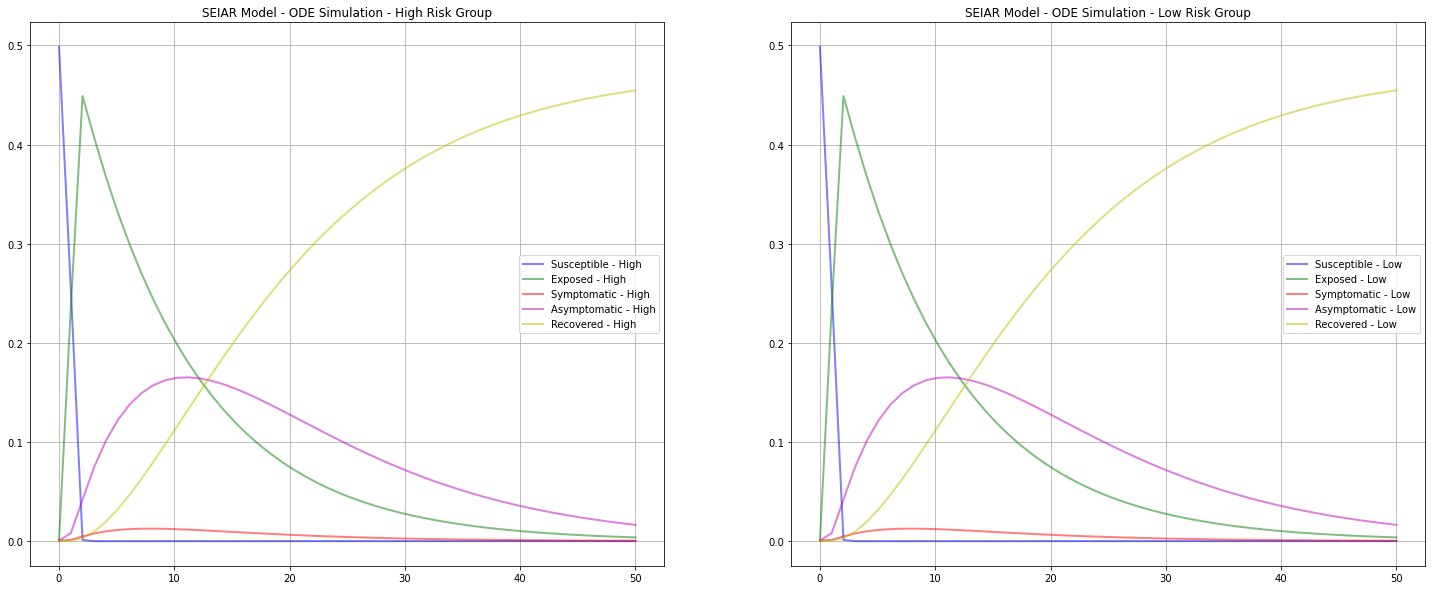

In [9]:
plot_six_regions(initial_pop, initial_param)